Import packages

# **Breast Cancer Analisys**

Based on the Breast Cancer Dataset of M YASSER H ("https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset")


## **imports**

In [1]:
import numpy as np # for linear algebra
import pandas as pd # data processing, CSV file I/O, etc
import seaborn as sns # for plots
import plotly.graph_objects as go # for plots
import plotly.express as px #for plots
import matplotlib.pyplot as plt # for visualizations and plots

from sklearn.model_selection import train_test_split # spliting training and testing data
from sklearn.preprocessing import MinMaxScaler, StandardScaler # data normalization with sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression # model
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score # to evaluate the model
from mlxtend.plotting import plot_confusion_matrix # plot confusion matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # model
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import plot_tree, export_text, DecisionTreeClassifier
import missingno as msno # for plotting missing data

#undersampling
from imblearn.under_sampling import NearMiss
from collections import Counter

#oversampling
from imblearn.over_sampling import SMOTE, SVMSMOTE

from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate # Tuning

## **Read dataset**
We have to read the CSV file, in this case it's *breast-cancer*


In [26]:
data = pd.read_csv('breast-cancer.csv')

##**Analyze dataset**
We have to analyze the information from the dataset.
If it contains null or empty data, incorrect data and so on.

In [27]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [28]:
data.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

###**The Breast Cancer Dataset consists of 569 data points, with 32 features each**

In [29]:
data.shape

(569, 32)

In [30]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [32]:
data.isnull().values.any()

False

In [33]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [34]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## **Plots**
Let's make some charts/plots, to analyze graphically the dataset

Text(0.5, 0, 'M = Malignant | B = Benign')

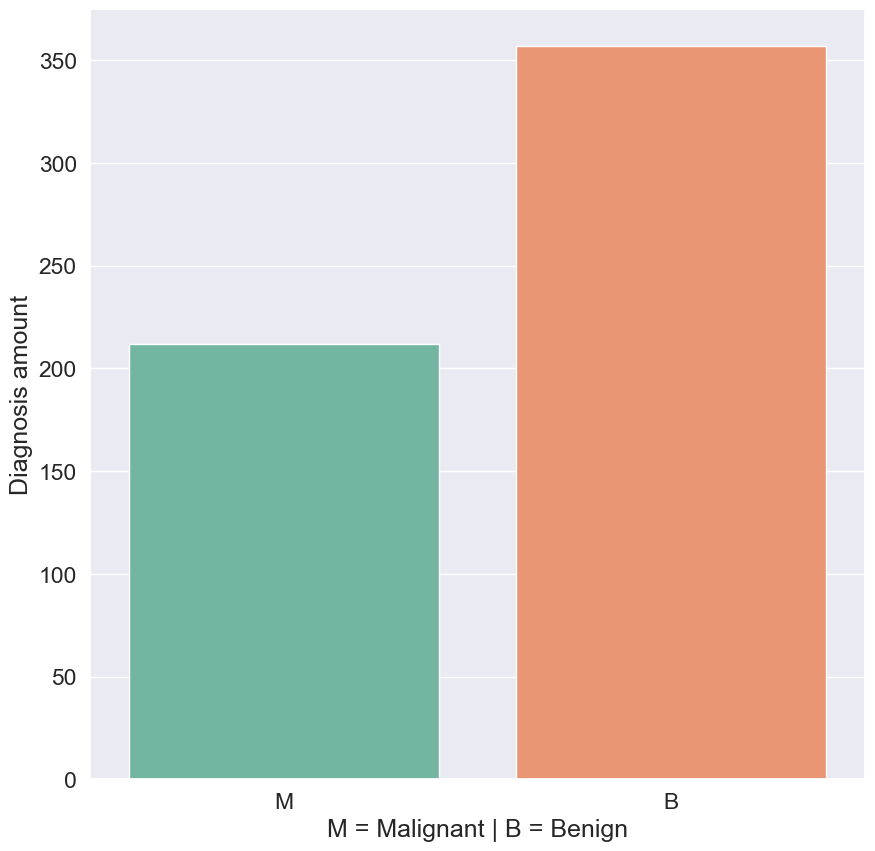

In [35]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.countplot(x='diagnosis', data=data, palette='Set2')
plt.ylabel('Diagnosis amount')
plt.xlabel('M = Malignant | B = Benign')

Text(0, 0, "['Benign', 'Malignant']")

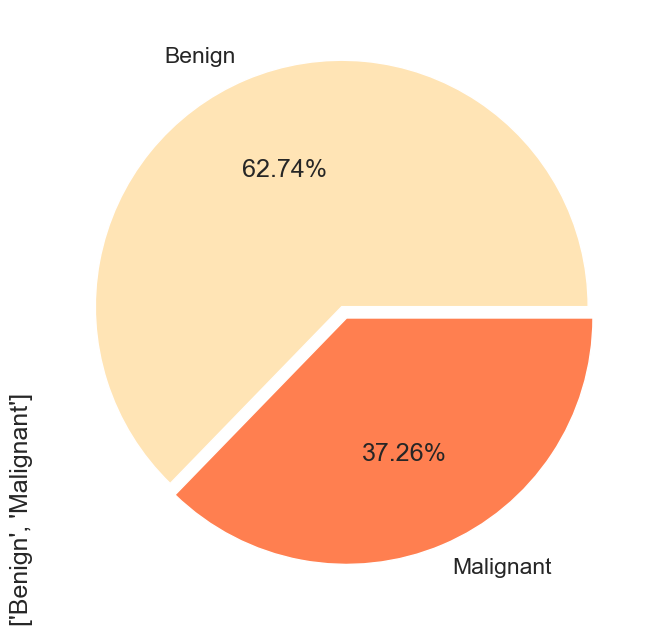

In [36]:
plt.figure(figsize=(8,8))
pie = data['diagnosis'].value_counts()
explode = (0.05, 0)
colors = ['moccasin', 'coral']
labels = ['Benign', 'Malignant']
sns.set(font_scale=1.5)
plt.pie(pie, labels = labels, autopct = "%.2f%%", explode = explode, colors = colors)
plt.ylabel(labels, loc='bottom')

In [37]:
px.pie(data, names='diagnosis')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 's

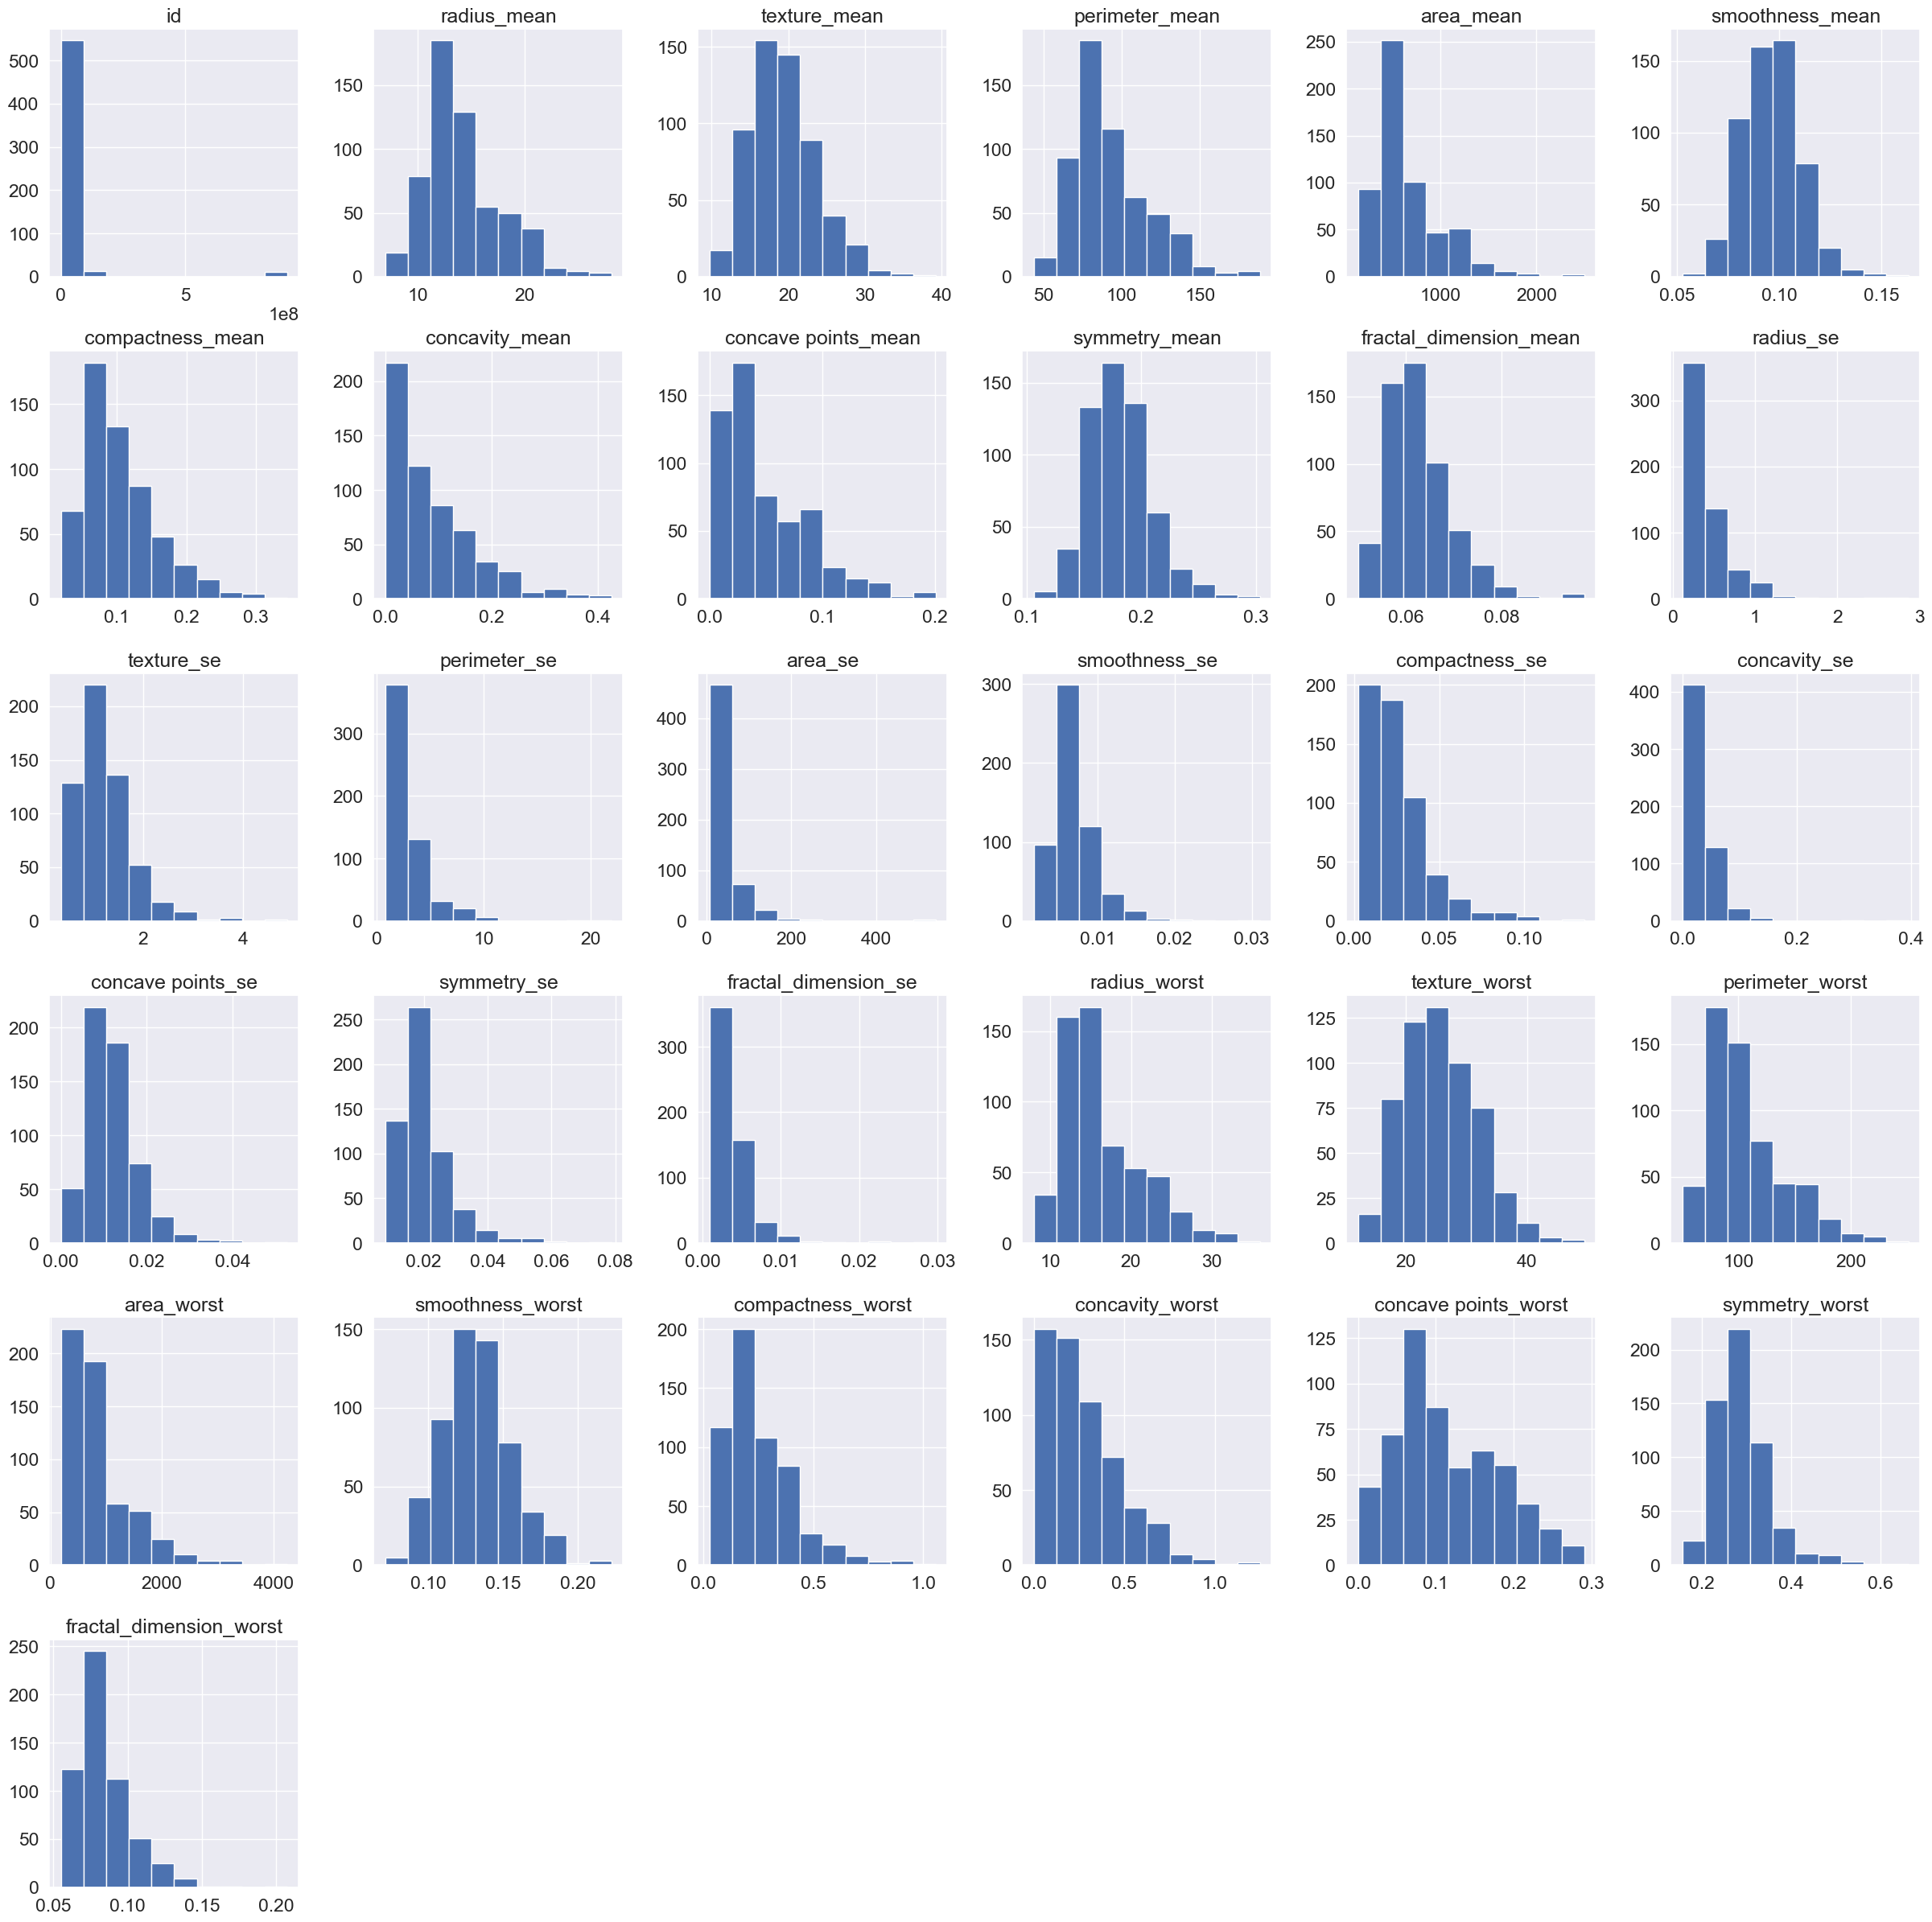

In [38]:
data.hist(figsize= (30,30), grid= True)

## **Clean Dataset**
Clean Diagnosis Column
and Drop ID Column

In [39]:
columns_to_drop = ['id']
data = data.drop(columns=columns_to_drop)

data_clean = data
data_clean = data_clean.copy(deep = True)

data_clean.loc[data_clean['diagnosis'] == 'M', "diagnosis"] = 1
data_clean.loc[data_clean['diagnosis'] == 'B', "diagnosis"] = 0

data_clean['diagnosis'] = data_clean['diagnosis'].astype(int)

In [40]:
data_clean['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [41]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [42]:
print(data_clean.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


<Axes: ylabel='count'>

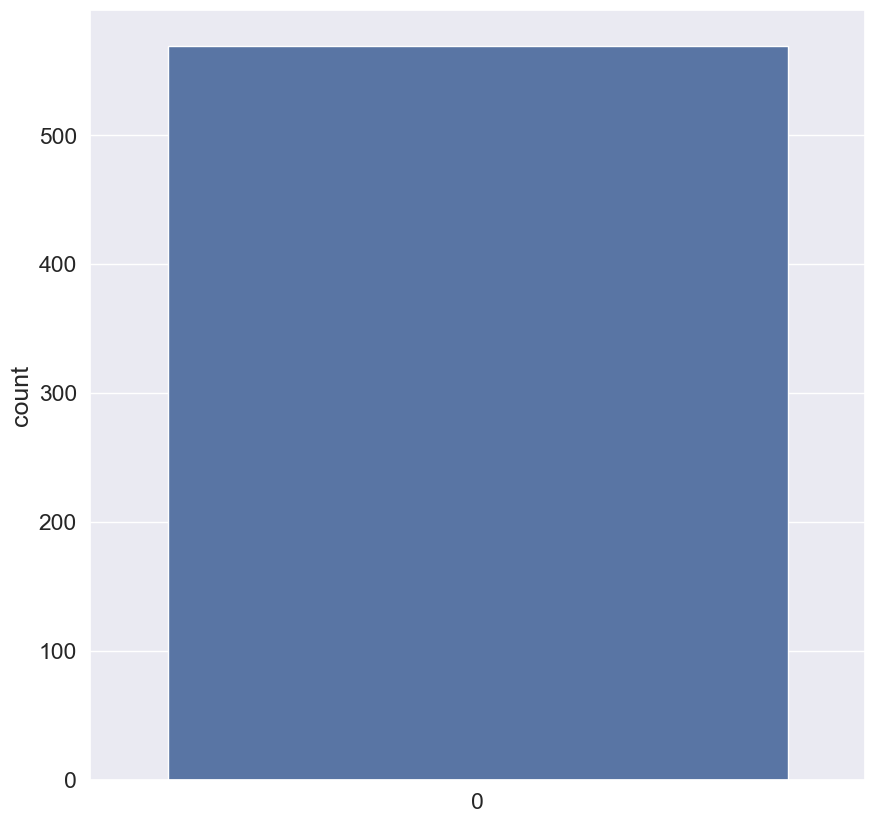

In [43]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.countplot(data_clean['diagnosis'])

### **Correlation matrix**

First, let's create a copy of the dataset to clean up some data

Text(0.5, 1.0, 'Correlation Matrix')

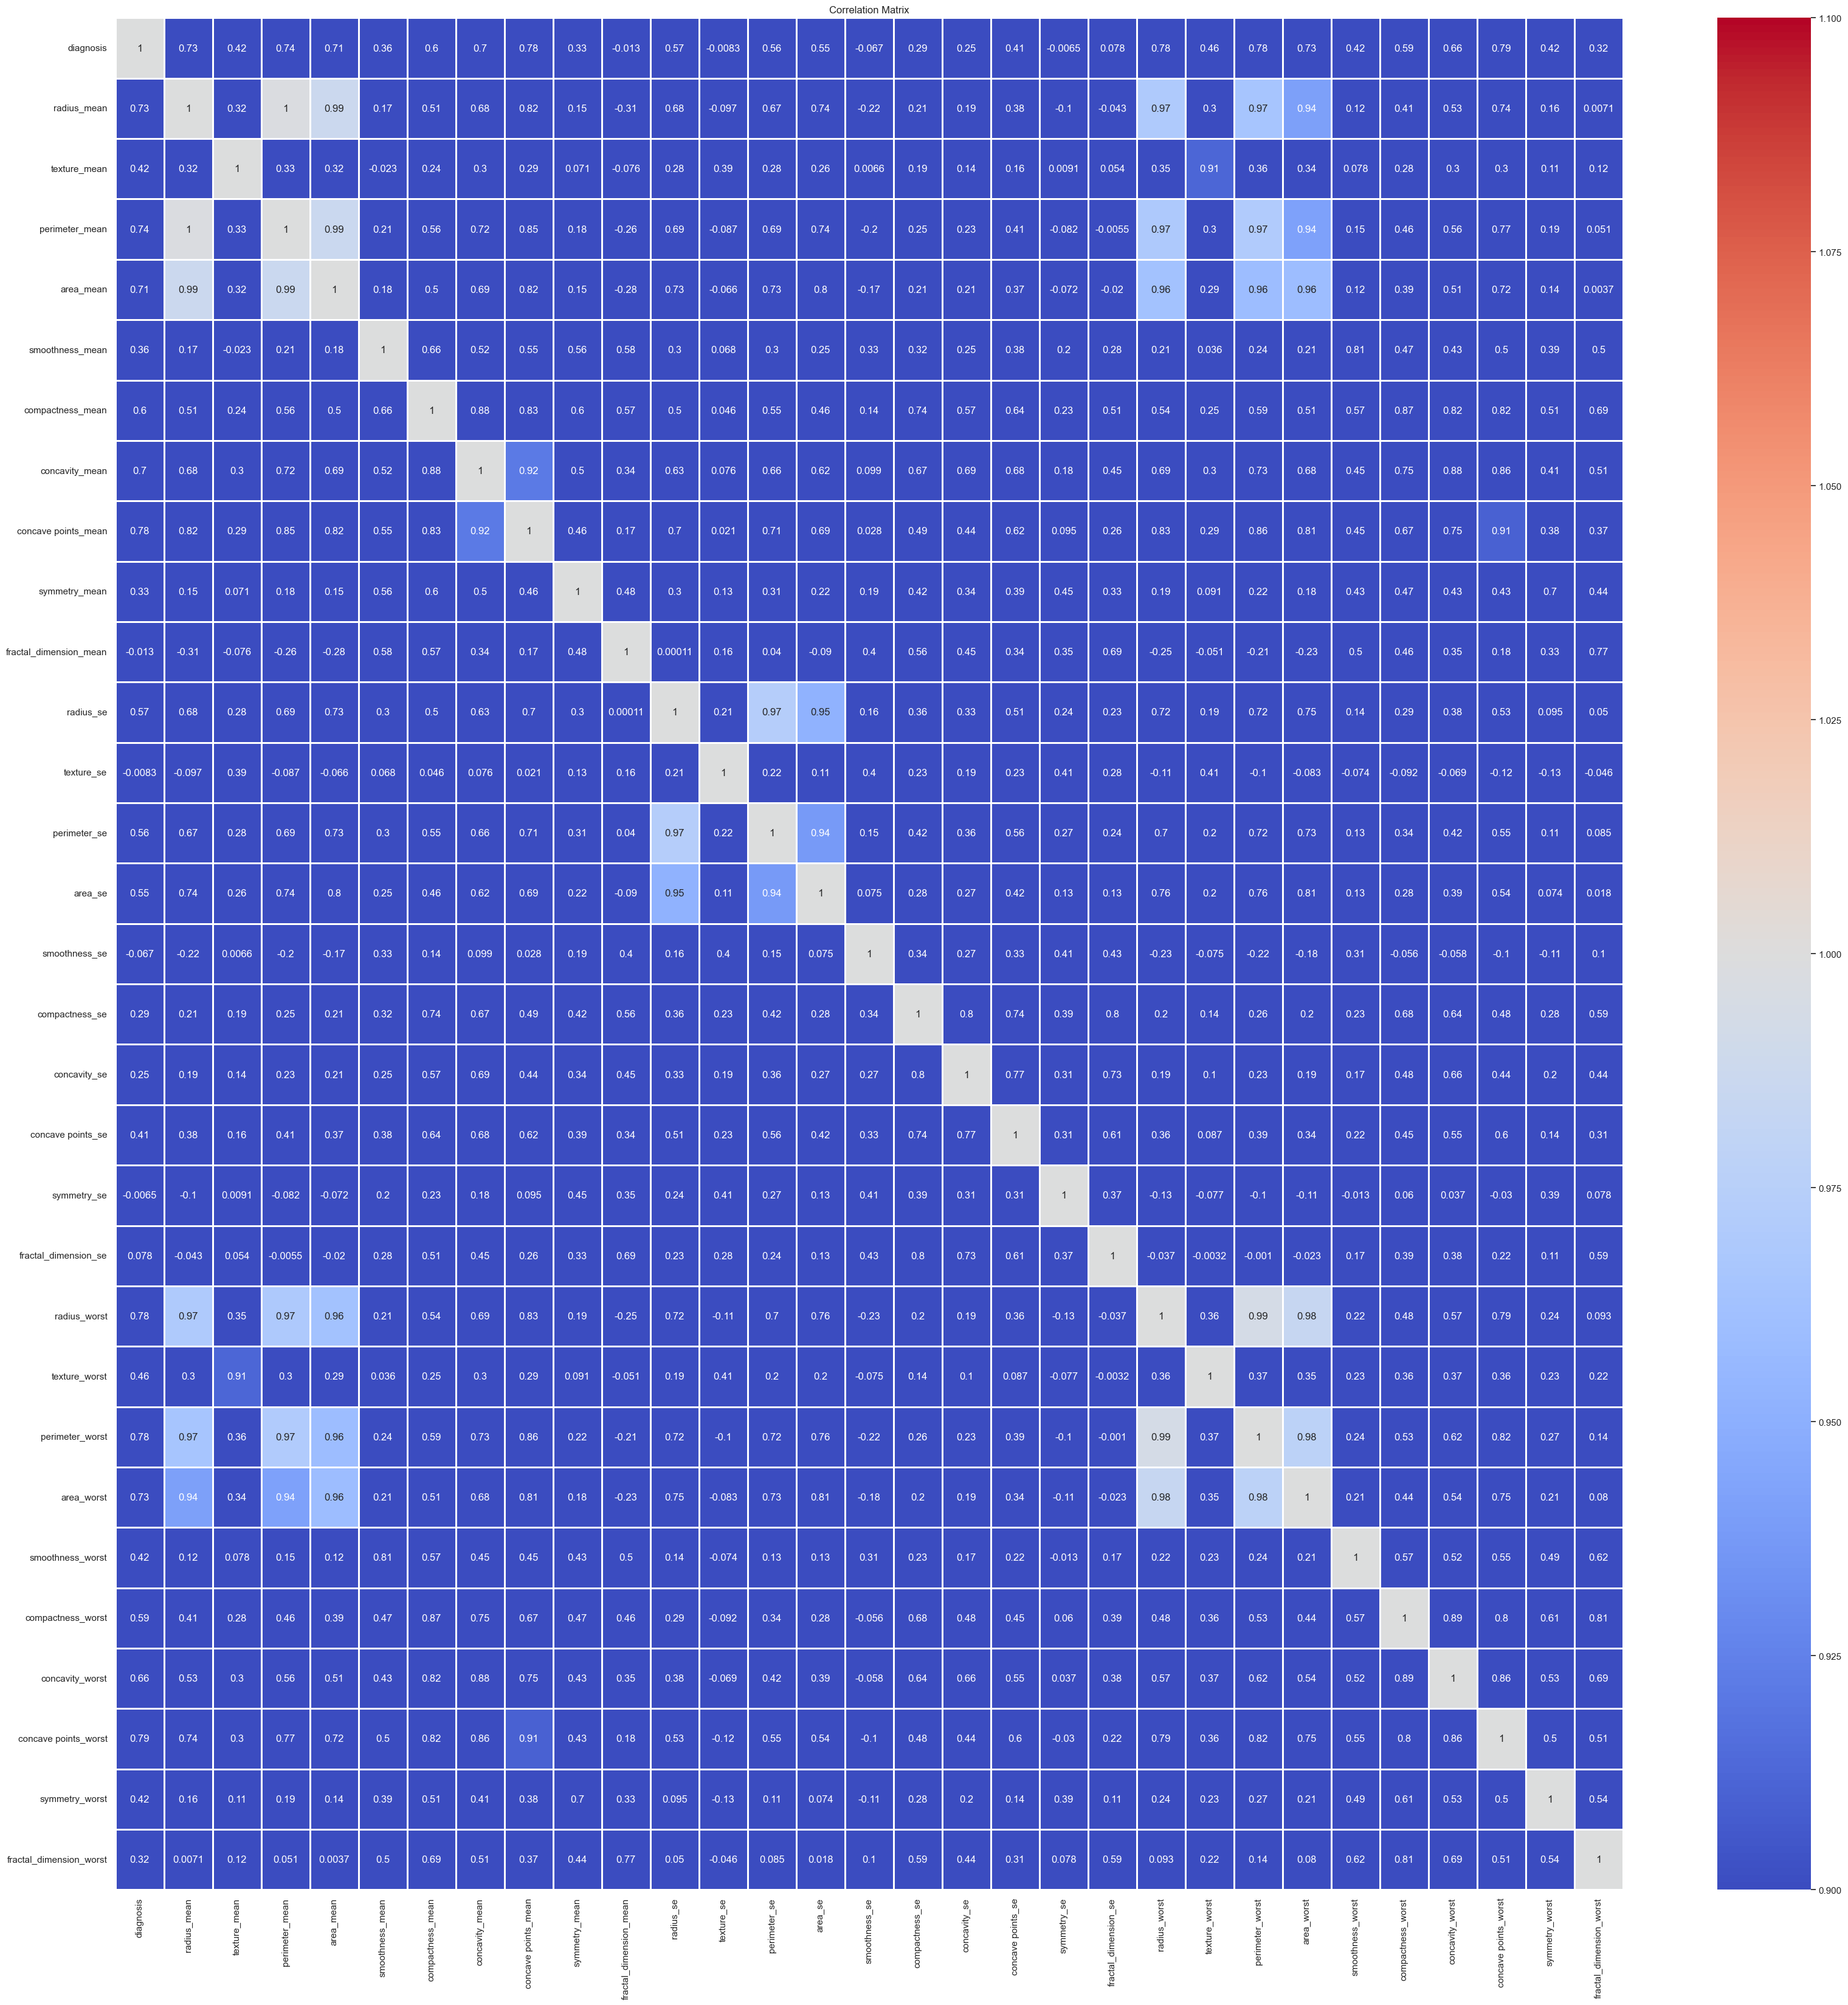

In [44]:
plt.figure(figsize=(40,40))
sns.set(font_scale=1)
sns.heatmap(data_clean.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=1.0, vmax=1.0, linecolor='white', linewidths=1).set_title("Correlation Matrix")

In [45]:
data_clean.isnull().sum()/len(data_clean)*100

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

## **Outliers**

In [46]:
data_clean.skew()

diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

In [47]:
Q1 = data_clean.quantile(.25)
Q3 = data_clean.quantile(.75)
IQR = Q1-Q3
IQR

diagnosis                   -1.000000
radius_mean                 -4.080000
texture_mean                -5.630000
perimeter_mean             -28.930000
area_mean                 -362.400000
smoothness_mean             -0.018930
compactness_mean            -0.065480
concavity_mean              -0.101140
concave points_mean         -0.053690
symmetry_mean               -0.033800
fractal_dimension_mean      -0.008420
radius_se                   -0.246500
texture_se                  -0.640100
perimeter_se                -1.751000
area_se                    -27.340000
smoothness_se               -0.002977
compactness_se              -0.019370
concavity_se                -0.026960
concave points_se           -0.007072
symmetry_se                 -0.008320
fractal_dimension_se        -0.002310
radius_worst                -5.780000
texture_worst               -8.640000
perimeter_worst            -41.290000
area_worst                -568.700000
smoothness_worst            -0.029400
compactness_

In [48]:
data_clean_out = data_clean[~((data_clean < (Q1-1.5 * IQR)) |  (data_clean > (Q3-1.5 * IQR))).any(axis=1)]
data_clean_out.shape

(0, 31)

## Normalize and Balance the data (undersampling)
### Undersampling to avoid overfitting

In [49]:
X = data_clean.copy(deep = True)

columns_to_drop = ['diagnosis']
X = X.drop(columns=columns_to_drop)
y = data_clean['diagnosis']

In [50]:
##Undersampling
undersampling = NearMiss(version=1, n_neighbors=3)

X_resampled, y_resampled = undersampling.fit_resample(X,y)

data_balanced = pd.concat([X_resampled, y_resampled], axis=1)
data_balanced

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          14.20         20.53           92.41      618.4          0.08931   
1          13.90         19.24           88.73      602.9          0.07991   
2          13.24         20.13           86.87      542.9          0.08284   
3          14.26         18.17           91.22      633.1          0.06576   
4          14.47         24.99           95.81      656.4          0.08837   
..           ...           ...             ...        ...              ...   
419        20.92         25.09          143.00     1347.0          0.10990   
420        21.56         22.39          142.00     1479.0          0.11100   
421        20.13         28.25          131.20     1261.0          0.09780   
422        16.60         28.08          108.30      858.1          0.08455   
423        20.60         29.33          140.10     1265.0          0.11780   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.11080         0.05063              0.03058         0.1506   
1             0.05326         0.02995              0.02070         0.1579   
2             0.12230         0.10100              0.02833         0.1601   
3             0.05220         0.02475              0.01374         0.1635   
4             0.12300         0.10090              0.03890         0.1872   
..                ...             ...                  ...            ...   
419           0.22360         0.31740              0.14740         0.2149   
420           0.11590         0.24390              0.13890         0.1726   
421           0.10340         0.14400              0.09791         0.1752   
422           0.10230         0.09251              0.05302         0.1590   
423           0.27700         0.35140              0.15200         0.2397   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                   0.06009  ...          27.26            112.1       828.5   
1                   0.05594  ...          26.42            104.4       830.5   
2                   0.06432  ...          25.50            115.0       733.5   
3                   0.05586  ...          25.26            105.8       819.7   
4                   0.06341  ...          31.73            113.5       808.9   
..                      ...  ...            ...              ...         ...   
419                 0.06879  ...          29.41            179.1      1819.0   
420                 0.05623  ...          26.40            166.1      2027.0   
421                 0.05533  ...          38.25            155.0      1731.0   
422                 0.05648  ...          34.12            126.7      1124.0   
423                 0.07016  ...          39.42            184.6      1821.0   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.11530             0.3429           0.2512   
1             0.10640             0.1415           0.1673   
2             0.12010             0.5646           0.6556   
3             0.09445             0.2167           0.1565   
4             0.13400             0.4202           0.4040   
..                ...                ...              ...   
419           0.14070             0.4186           0.6599   
420           0.14100             0.2113           0.4107   
421           0.11660             0.1922           0.3215   
422           0.11390             0.3094           0.3403   
423           0.16500             0.8681           0.9387   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0                  0.1339          0.2534                  0.07858          0  
1                  0.0815          0.2356                  0.07603          0  
2                  0.1357          0.2845                  0.12490          0  
3                  0.0753          0.2636                  0.07676          0  
4                  0.1205          0.3187        

In [51]:
print(data_balanced.groupby('diagnosis').size())

diagnosis
0    212
1    212
dtype: int64


In [52]:
X = data_balanced[data_balanced.columns[:-1]]
y = data_balanced['diagnosis']


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Scaling the data

In [54]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

## **Data modeling**

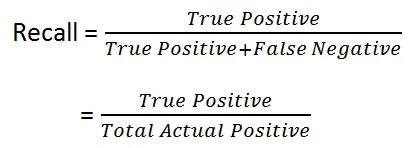

**Let's focus on the RECALL value**



The above equation can be explained by saying, from all the positive classes, how many we predicted correctly. Recall should be high as possible.

Recall calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive).
We know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

"If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative). The cost associated with False Negative will be extremely high if the sickness is contagious."

In our case (Breast Cancer) it would be critical if a patient goes through a cancer test and the diagnosis is predicted as a Benign cancer but it actually is a Malignant cancer

Taken from:

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9


https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

### **LogisticRegression**

In [55]:
log_model = LogisticRegression()
log_model.fit(X_train_norm, y_train)
log_pred = log_model.predict(X_test_norm)

print("\n\t\t\t0 = Benign \n\t\t\t1 = Malignant")
print("\n", classification_report(y_test, log_pred))


			0 = Benign 
			1 = Malignant

               precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.95      0.98        42

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



In [56]:
print("LogisticRegression Recall: {:.4f}".format(recall_score(y_test, log_pred)))

train_recall = recall_score(y_train, log_model.predict(X_train_norm))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, log_model.predict(X_test_norm))
print("Recall on test set: {:.2f}".format(test_recall))

LogisticRegression Recall: 0.9524
Recall on training set: 0.94
Recall on test set: 0.95


([<matplotlib.axis.YTick at 0x2382e998d50>,
 [Text(0, 0, 'Benign'), Text(0, 1, 'Malignant')])

<Figure size 640x480 with 0 Axes>

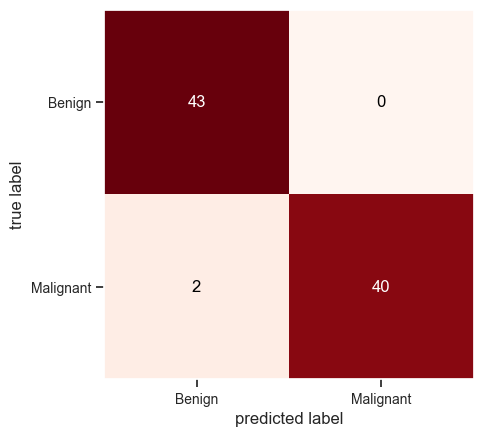

In [57]:
labels = ['Benign', 'Malignant']
cm = confusion_matrix(y_test, log_pred)
plt.figure()
plot_confusion_matrix(cm, hide_ticks=True, cmap='Reds')
plt.xticks(range(2), labels, fontsize=10)
plt.yticks(range(2), labels, fontsize=10)

#### HeatMap instead of plot_confusion_matrix

<Axes: >

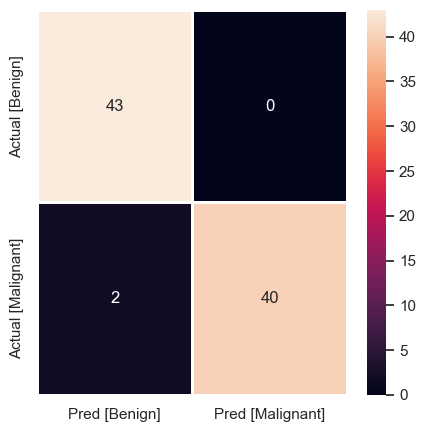

In [58]:
ylabel = ["Actual [Benign]","Actual [Malignant]"]
xlabel = ["Pred [Benign]","Pred [Malignant]"]
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

### **RandomForestClassifier**

In [59]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_norm, y_train)
rf_pred = rf_model.predict(X_test_norm)

print("\n\t\t\t0 = Benign \n\t\t\t1 = Malignant")
print("\n", classification_report(y_test, rf_pred))


			0 = Benign 
			1 = Malignant

               precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.95      0.90      0.93        42

    accuracy                           0.93        85
   macro avg       0.93      0.93      0.93        85
weighted avg       0.93      0.93      0.93        85



In [60]:
print("RandomForestClassifier Recall: {:.4f}".format(recall_score(y_test, rf_pred)))

train_recall = recall_score(y_train, rf_model.predict(X_train_norm))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, rf_model.predict(X_test_norm))
print("Recall on test set: {:.2f}".format(test_recall))

RandomForestClassifier Recall: 0.9048
Recall on training set: 1.00
Recall on test set: 0.90


([<matplotlib.axis.YTick at 0x2382f639850>,
 [Text(0, 0, 'Benign'), Text(0, 1, 'Malignant')])

<Figure size 640x480 with 0 Axes>

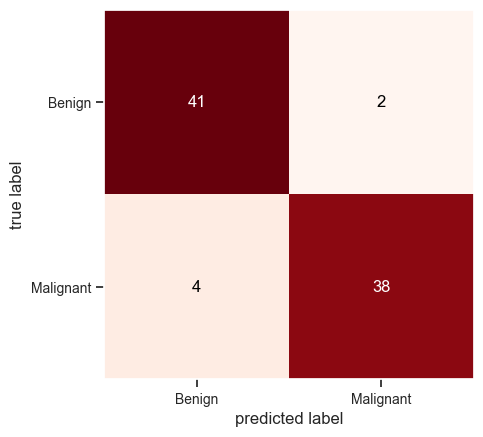

In [61]:
cm = confusion_matrix(y_test, rf_pred)
plt.figure()
plot_confusion_matrix(cm, hide_ticks=True, cmap='Reds')
plt.xticks(range(2), labels, fontsize=10)
plt.yticks(range(2), labels, fontsize=10)

#### **Random Forest with params**

In [62]:
rf1_model = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1_model.fit(X_train_norm, y_train)
rf1_pred = rf1_model.predict(X_test_norm)

print("\t\t\t0 = Benign \n\t\t\t1 = Malignant")
print("\n", classification_report(y_train, rf1_model.predict(X_train_norm)))
print("\n", classification_report(y_test, rf1_model.predict(X_test_norm)))

			0 = Benign 
			1 = Malignant

               precision    recall  f1-score   support

           0       0.98      0.99      0.98       169
           1       0.99      0.98      0.98       170

    accuracy                           0.98       339
   macro avg       0.98      0.98      0.98       339
weighted avg       0.98      0.98      0.98       339


               precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.93      0.90      0.92        42

    accuracy                           0.92        85
   macro avg       0.92      0.92      0.92        85
weighted avg       0.92      0.92      0.92        85



In [63]:
print("RandomForestClassifier 1 Recall: {:.4f}".format(recall_score(y_test, rf1_pred)))

train_recall = recall_score(y_train, rf1_model.predict(X_train_norm))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, rf1_model.predict(X_test_norm))
print("Recall on test set: {:.2f}".format(test_recall))

RandomForestClassifier 1 Recall: 0.9048
Recall on training set: 0.98
Recall on test set: 0.90


([<matplotlib.axis.YTick at 0x2382ea760d0>,
 [Text(0, 0, 'Benign'), Text(0, 1, 'Malignant')])

<Figure size 640x480 with 0 Axes>

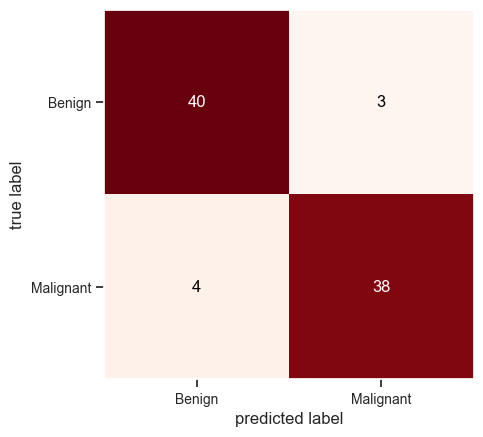

In [64]:
cm = confusion_matrix(y_test, rf1_pred)
plt.figure()
plot_confusion_matrix(cm, hide_ticks=True, cmap='Reds')
plt.xticks(range(2), labels, fontsize=10)
plt.yticks(range(2), labels, fontsize=10)

### **Support Vector Classification**

In [65]:
svm_model = SVC().fit(X_train_norm, y_train)
svm_pred = svm_model.predict(X_test_norm)

print("\n\t\t\t0 = Benign \n\t\t\t1 = Malignant")
print("\n", classification_report(y_test, svm_pred))


			0 = Benign 
			1 = Malignant

               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.98      0.95      0.96        42

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



In [66]:
print("Support Vector Classification Recall: {:.4f}".format(recall_score(y_test, svm_pred)))

train_recall = recall_score(y_train, svm_model.predict(X_train_norm))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, svm_model.predict(X_test_norm))
print("Recall on test set: {:.2f}".format(test_recall))

Support Vector Classification Recall: 0.9524
Recall on training set: 0.96
Recall on test set: 0.95


([<matplotlib.axis.YTick at 0x2382f6ed050>,
 [Text(0, 0, 'Benign'), Text(0, 1, 'Malignant')])

<Figure size 640x480 with 0 Axes>

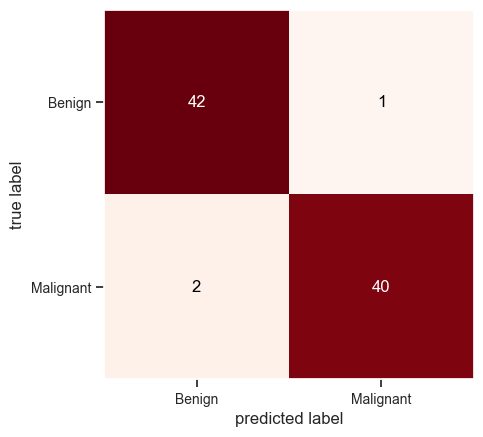

In [67]:
cm = confusion_matrix(y_test, svm_pred)
plt.figure()
plot_confusion_matrix(cm, hide_ticks=True, cmap='Reds')
plt.xticks(range(2), labels, fontsize=10)
plt.yticks(range(2), labels, fontsize=10)

#### **USING sklearn.metrics.ConfusionMatrixDisplay**

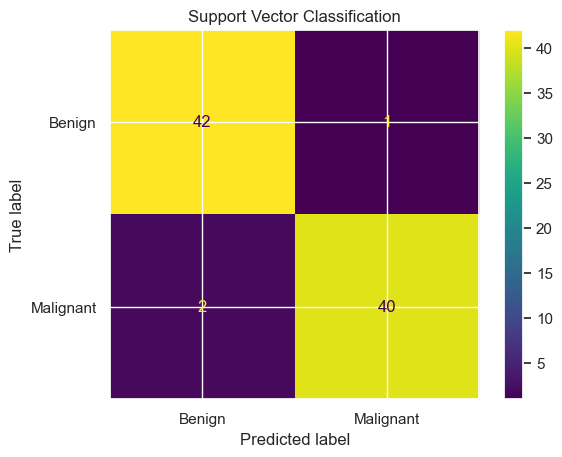

In [68]:
svm_model = SVC().fit(X_train_norm, y_train)
svm_pred = svm_model.predict(X_test_norm)
disp = ConfusionMatrixDisplay.from_predictions(y_test, svm_pred , display_labels=labels)
disp.ax_.set_title("Support Vector Classification")
plt.show()

### **Gaussian NB**

In [69]:
nb_model = GaussianNB()
nb_model.fit(X_train_norm, y_train)
nb_pred = nb_model.predict(X_test_norm)

print("\n\t\t\t0 = Benign \n\t\t\t1 = Malignant")
print("\n", classification_report(y_test, nb_pred))


			0 = Benign 
			1 = Malignant

               precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.90      0.88      0.89        42

    accuracy                           0.89        85
   macro avg       0.89      0.89      0.89        85
weighted avg       0.89      0.89      0.89        85



In [70]:
print("GaussianNB Recall: {:.4f}".format(recall_score(y_test, nb_pred)))

train_recall = recall_score(y_train, nb_model.predict(X_train_norm))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, nb_model.predict(X_test_norm))
print("Recall on test set: {:.2f}".format(test_recall))

GaussianNB Recall: 0.8810
Recall on training set: 0.90
Recall on test set: 0.88


([<matplotlib.axis.YTick at 0x2382f613ad0>,
 [Text(0, 0, 'Benign'), Text(0, 1, 'Malignant')])

<Figure size 640x480 with 0 Axes>

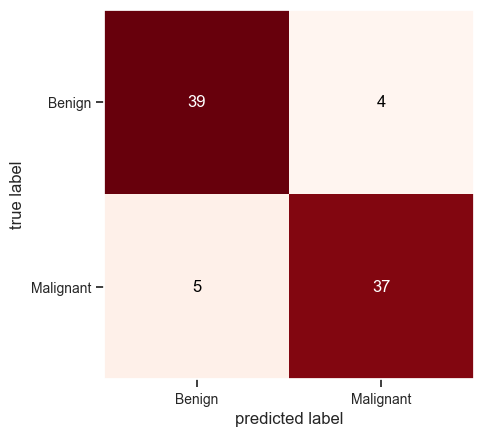

In [71]:
cm = confusion_matrix(y_test, nb_pred)
plt.figure()
plot_confusion_matrix(cm, hide_ticks=True, cmap='Reds')
plt.xticks(range(2), labels, fontsize=10)
plt.yticks(range(2), labels, fontsize=10)

### **Decision Tree Classifier**

In [72]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_norm, y_train)
dt_pred = dt_model.predict(X_test_norm)

print("\n\t\t\t0 = Benign \n\t\t\t1 = Malignant")
print("\n", classification_report(y_test, dt_pred))


			0 = Benign 
			1 = Malignant

               precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.87      0.95      0.91        42

    accuracy                           0.91        85
   macro avg       0.91      0.91      0.91        85
weighted avg       0.91      0.91      0.91        85



In [73]:
print("DecisionTreeClassifier Recall: {:.4f}".format(recall_score(y_test, dt_pred)))

train_recall = recall_score(y_train, dt_model.predict(X_train_norm))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, dt_model.predict(X_test_norm))
print("Recall on test set: {:.2f}".format(test_recall))

DecisionTreeClassifier Recall: 0.9524
Recall on training set: 1.00
Recall on test set: 0.95


([<matplotlib.axis.YTick at 0x2382fbae210>,
 [Text(0, 0, 'Benign'), Text(0, 1, 'Malignant')])

<Figure size 640x480 with 0 Axes>

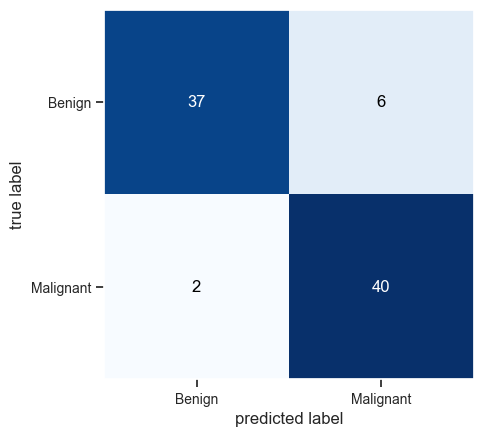

In [74]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, hide_ticks=True, cmap='Blues')
plt.xticks(range(2), labels, fontsize=10)
plt.yticks(range(2), labels, fontsize=10)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

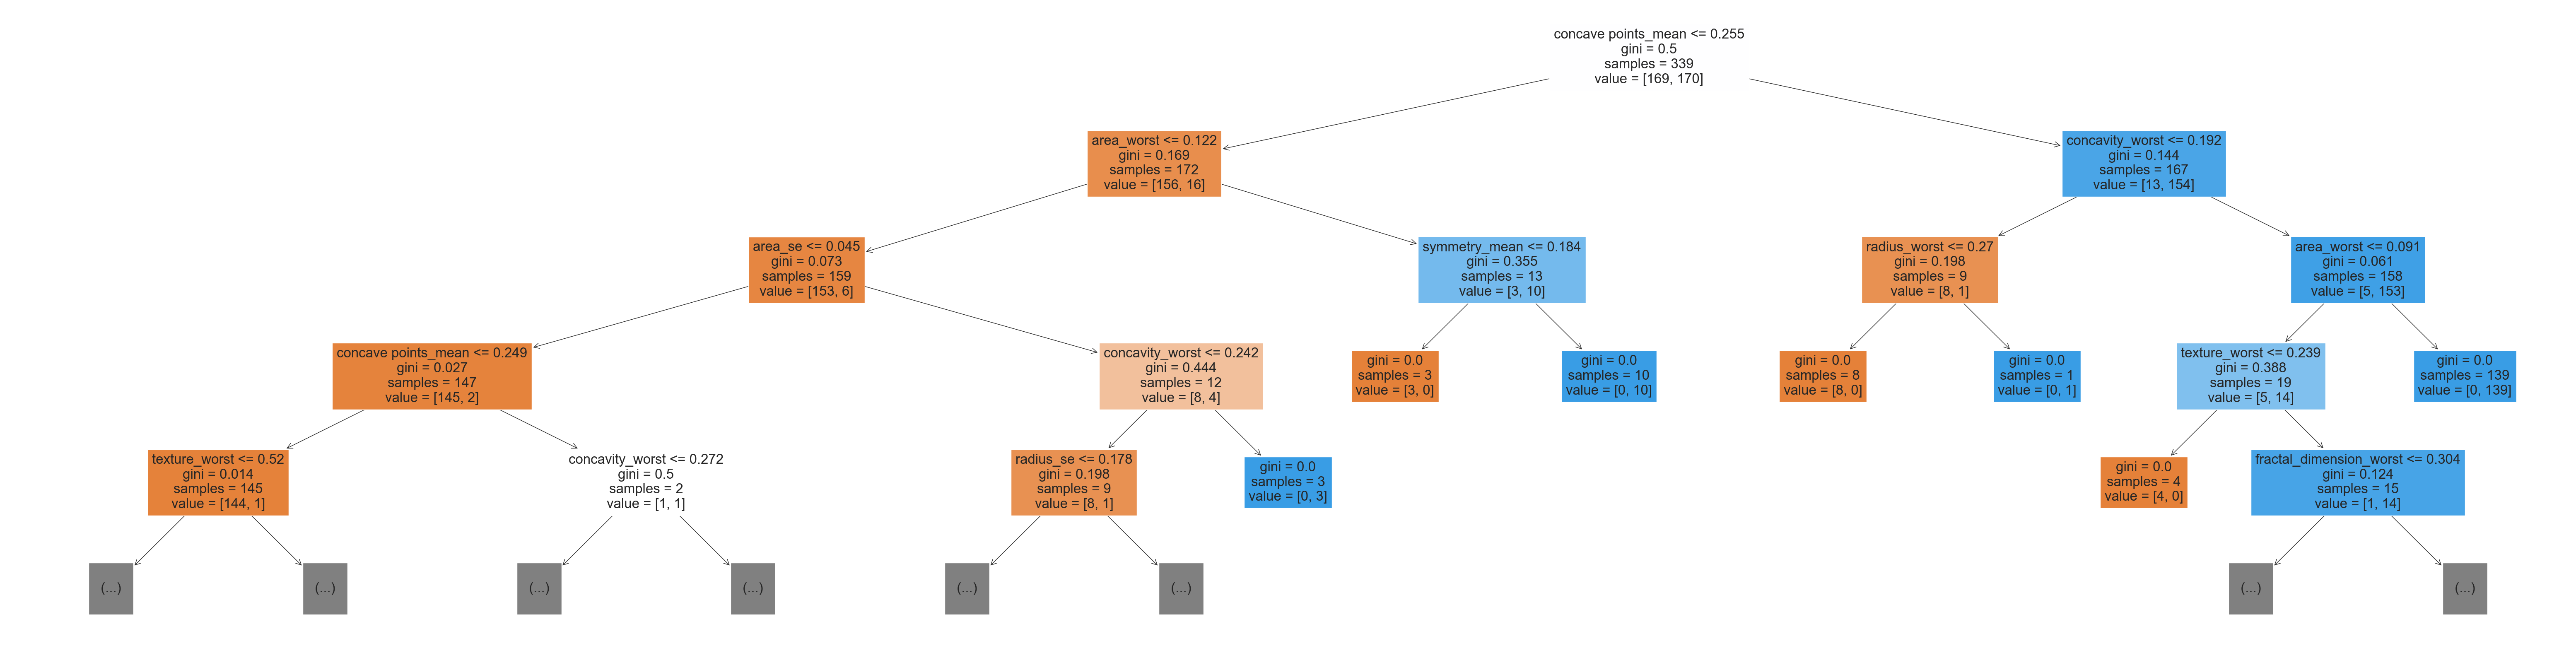

In [75]:
plt.figure(figsize =(80,20))

plot_tree(dt_model, feature_names=X_train.columns, max_depth=4, filled=True);

X_train.columns

### **Decision Tree with Max Depth**

In [76]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_model.fit(X_train_norm, y_train)
tree_pred = tree_model.predict(X_test_norm)

print("\n\t\t\t0 = Benign \n\t\t\t1 = Malignant")
print("\n", classification_report(y_test, tree_pred))


			0 = Benign 
			1 = Malignant

               precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.89      0.93      0.91        42

    accuracy                           0.91        85
   macro avg       0.91      0.91      0.91        85
weighted avg       0.91      0.91      0.91        85



In [77]:
print("DecisionTreeClassifier with Max Depth Recall: {:.4f}".format(recall_score(y_test, tree_pred)))

train_recall = recall_score(y_train, tree_model.predict(X_train_norm))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, tree_model.predict(X_test_norm))
print("Recall on test set: {:.2f}".format(test_recall))

DecisionTreeClassifier with Max Depth Recall: 0.9286
Recall on training set: 0.96
Recall on test set: 0.93


In [78]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

acc_train_array = []
acc_valid_array = []
random_forest_settings = range(1, 21)


for max_d in random_forest_settings:
  tree = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  tree.fit(X_train_norm, y_train)
  tree_pred = tree.predict(X_test_norm)

  y_pred = tree.predict(X_train_norm)
  acc_train = recall_score(y_train, y_pred)
  acc_train_array.append(acc_train)

  y_pred = tree.predict(X_test_norm)
  acc_valid = recall_score(y_test, y_pred)
  acc_valid_array.append(acc_valid)
  print("Recall score {:.4f}".format(acc_valid))

Recall score 0.9048
Recall score 0.9048
Recall score 0.9286
Recall score 0.9048
Recall score 0.8810
Recall score 0.9286
Recall score 0.9286
Recall score 0.9286
Recall score 0.9286
Recall score 0.9286
Recall score 0.9286
Recall score 0.9286
Recall score 0.9286
Recall score 0.9286
Recall score 0.9286
Recall score 0.9286
Recall score 0.9286
Recall score 0.9286
Recall score 0.9286
Recall score 0.9286


For train set:
[0.9058823529411765, 0.9588235294117647, 0.9647058823529412, 0.9823529411764705, 0.9882352941176471, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
For valid set:
[0.9047619047619048, 0.9047619047619048, 0.9285714285714286, 0.9047619047619048, 0.8809523809523809, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286]


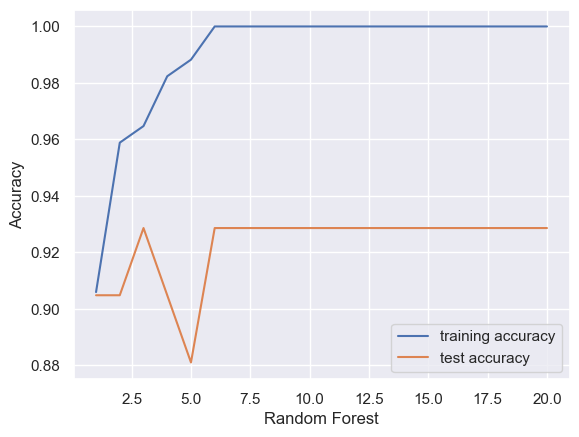

In [79]:
print('For train set:')
print(acc_train_array)
print('For valid set:')
print(acc_valid_array)


plt.plot(random_forest_settings, acc_train_array, label="training accuracy")
plt.plot(random_forest_settings, acc_valid_array, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Random Forest")
plt.legend()
plt.savefig('random_forest_resolve_overfitting_model')

### **K_Neigbors**

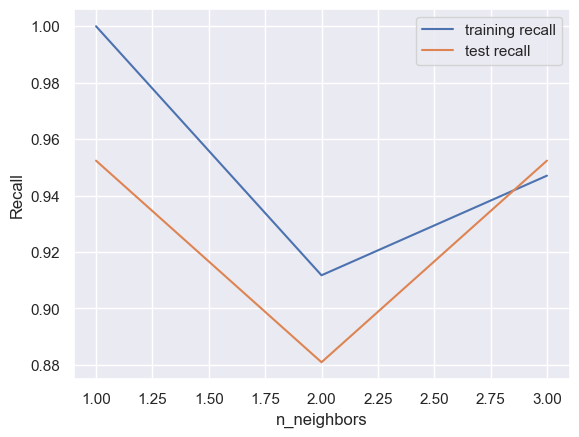

In [80]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 4)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_norm, y_train)

    train_recall = recall_score(y_train, knn.predict(X_train_norm))
    test_recall = recall_score(y_test, knn.predict(X_test_norm))

    training_accuracy.append(train_recall)
    test_accuracy.append(test_recall)

plt.plot(neighbors_settings, training_accuracy, label="training recall")
plt.plot(neighbors_settings, test_accuracy, label="test recall")
plt.ylabel("Recall")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [81]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_norm, y_train)
knn_pred = knn_model.predict(X_test_norm)

print("\n\t\t\t0 = Benign \n\t\t\t1 = Malignant")
print("\n", classification_report(y_test, knn_pred))


			0 = Benign 
			1 = Malignant

               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.95      0.95      0.95        42

    accuracy                           0.95        85
   macro avg       0.95      0.95      0.95        85
weighted avg       0.95      0.95      0.95        85



In [82]:
print("KNeighborsClassifier Recall: {:.4f}".format(recall_score(y_test, knn_pred)))

train_recall = recall_score(y_train, knn_model.predict(X_train_norm))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, knn_model.predict(X_test_norm))
print("Recall on test set: {:.2f}".format(test_recall))

KNeighborsClassifier Recall: 0.9524
Recall on training set: 0.94
Recall on test set: 0.95


### **Gradient Boosting**

In [83]:
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train_norm, y_train)
gb_pred = gb_model.predict(X_test_norm)

print("\n\t\t\t0 = Benign \n\t\t\t1 = Malignant")
print("\n", classification_report(y_test, gb_pred))


			0 = Benign 
			1 = Malignant

               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.91      0.98      0.94        42

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85



In [84]:
print("Gradient Boosting Recall: {:.4f}".format(recall_score(y_test, gb_pred)))

train_recall = recall_score(y_train, gb_model.predict(X_train_norm))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, gb_model.predict(X_test_norm))
print("Recall on test set: {:.2f}".format(test_recall))

Gradient Boosting Recall: 0.9762
Recall on training set: 1.00
Recall on test set: 0.98


#### **Gradient Boosting with params**

In [85]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train_norm, y_train)

gb1_pred = gb1.predict(X_test_norm)

print("\n\t\t\t0 = Benign \n\t\t\t1 = Malignant")
print("\n", classification_report(y_test, gb1_pred))


			0 = Benign 
			1 = Malignant

               precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.95      0.90      0.93        42

    accuracy                           0.93        85
   macro avg       0.93      0.93      0.93        85
weighted avg       0.93      0.93      0.93        85



In [86]:
print("Gradient Boosting 1 Recall: {:.4f}".format(recall_score(y_test, gb1_pred)))

train_recall = recall_score(y_train, gb1.predict(X_train_norm))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, gb1.predict(X_test_norm))
print("Recall on test set: {:.2f}".format(test_recall))

Gradient Boosting 1 Recall: 0.9048
Recall on training set: 0.98
Recall on test set: 0.90


In [87]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train_norm, y_train)
gb2_pred = gb2.predict(X_test_norm)

print("\n\t\t\t0 = Benign \n\t\t\t1 = Malignant")
print("\n", classification_report(y_test, gb2_pred))


			0 = Benign 
			1 = Malignant

               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.91      0.93      0.92        42

    accuracy                           0.92        85
   macro avg       0.92      0.92      0.92        85
weighted avg       0.92      0.92      0.92        85



In [88]:
print("Gradient Boosting 2 Recall: {:.4f}".format(recall_score(y_test, gb2_pred)))

train_recall = recall_score(y_train, gb2.predict(X_train_norm))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, gb2.predict(X_test_norm))
print("Recall on test set: {:.2f}".format(test_recall))

Gradient Boosting 2 Recall: 0.9286
Recall on training set: 0.99
Recall on test set: 0.93


**As seen above, the "max_depth" and the "learning_rate" did not help to get better results actually both GB1 and GB2 are worst than the GB model**

### **Neural Networks**

In [89]:
mlp_model = MLPClassifier(random_state=42, max_iter=600)
mlp_model.fit(X_train_norm, y_train)
mlp_pred = mlp_model.predict(X_test_norm)

print("\n\t\t\t0 = Benign \n\t\t\t1 = Malignant")
print("\n", classification_report(y_test, mlp_pred))


			0 = Benign 
			1 = Malignant

               precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.97      0.93      0.95        42

    accuracy                           0.95        85
   macro avg       0.95      0.95      0.95        85
weighted avg       0.95      0.95      0.95        85



In [90]:
print("Neural Networks Recall: {:.4f}".format(recall_score(y_test, mlp_pred)))

train_recall = recall_score(y_train, mlp_model.predict(X_train_norm))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, mlp_model.predict(X_test_norm))
print("Recall on test set: {:.2f}".format(test_recall))

Neural Networks Recall: 0.9286
Recall on training set: 0.98
Recall on test set: 0.93


#### **Neural Network without the normalize data**

In [91]:
mlp1 = MLPClassifier(random_state=42, max_iter=600)
mlp1.fit(X_train, y_train)
mlp1_pred = mlp1.predict(X_test_norm)

print("\n\t\t\t0 = Benign \n\t\t\t1 = Malignant")
print("\n", classification_report(y_test, mlp1_pred))


			0 = Benign 
			1 = Malignant

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.49      1.00      0.66        42

    accuracy                           0.49        85
   macro avg       0.25      0.50      0.33        85
weighted avg       0.24      0.49      0.33        85



In [92]:
print("Neural Networks 1 Recall: {:.4f}".format(recall_score(y_test, mlp1_pred)))

train_recall = recall_score(y_train, mlp1.predict(X_train))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, mlp1.predict(X_test))
print("Recall on test set: {:.2f}".format(test_recall))

Neural Networks 1 Recall: 1.0000
Recall on training set: 0.92
Recall on test set: 0.90


**As seen above, the recall score on both training and test are 1 on the Neural Network without the normalized data, this means that the data has to be normalized, because if it is not normalized the model is overfitted**

#### **Neural Network using Standard Scaler**

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp_standard = MLPClassifier(random_state=0, max_iter=300)
mlp_standard.fit(X_train_scaled, y_train)
mlp_standarized_pred = mlp_standard.predict(X_test_scaled)

print("\n\t\t\t0 = Benign \n\t\t\t1 = Malignant")
print("\n", classification_report(y_test, mlp_standarized_pred))


			0 = Benign 
			1 = Malignant

               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.98      0.98      0.98        42

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



In [94]:
print("Neural Networks Scaled Recall: {:.4f}".format(recall_score(y_test, mlp_standarized_pred)))

train_recall = recall_score(y_train, mlp_standard.predict(X_train_scaled))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, mlp_standard.predict(X_test_scaled))
print("Recall on test set: {:.2f}".format(test_recall))

Neural Networks Scaled Recall: 0.9762
Recall on training set: 0.99
Recall on test set: 0.98


**As seen above, also the recall score on both training and test are 1 on the Neural Network using Standard Scale, this means that the data has to be normalized using another algorithm, because if it is not normalized the model is overfitted**

### K-FOLD


In [95]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))


names = []
scores = []
for name, model in models:
    model.fit(X_train_norm, y_train)
    y_pred = model.predict(X_test_norm)
    scores.append(recall_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.952381
1  SVC  0.952381
2   LR  0.952381
3   DT  0.880952
4  GNB  0.880952
5   RF  0.928571
6   GB  0.952381


In [96]:
names = []
scores = []
for name, model in models:

    kfold = KFold(n_splits=10)
    score = cross_val_score(model, X_train_norm, y_train, cv=kfold, scoring='recall').mean()
    #score = cross_validate(model, X_train_norm, y_train, cv=kfold, scoring='recall')

    names.append(name)
    scores.append(score)
    print("Name: {}, Score: {:.4f}".format(name,score))

Name: KNN, Score: 0.9291
Name: SVC, Score: 0.9514
Name: LR, Score: 0.9159
Name: DT, Score: 0.8897
Name: GNB, Score: 0.8968
Name: RF, Score: 0.9574
Name: GB, Score: 0.9502


## **Hyperparameters**

### GridSearchCV and LogisticRegression

In [97]:
c_values = list(np.arange(1, 10))
param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

grid = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, scoring='recall')
grid.fit(X_train_norm, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l2'],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs']}],
             scoring='recall')

In [98]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 6, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=6, multi_class='ovr', penalty='l1', solver='liblinear')


In [99]:
log_with_params = LogisticRegression(C=6, multi_class='ovr', penalty='l1', solver='liblinear')
log_with_params_score = cross_val_score(log_with_params, X_train_norm, y_train, cv=kfold, scoring='recall').mean()
print("LogisticRegression's Recall using hyperparameters: {:.4f} ".format(log_with_params_score))

LogisticRegression's Recall using hyperparameters: 0.9764 


### Random Forest Turing with RandomSearch

In [100]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [101]:
#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [102]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_random_search_model = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random_search = RandomizedSearchCV(estimator = rf_random_search_model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_search.fit(X_train_norm, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=2)

In [103]:
print(rf_random_search.best_params_)
print(rf_random_search.best_estimator_)
print(rf_random_search.best_score_)

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)
0.9469026548672567


In [104]:
train_recall = recall_score(y_train, rf_random_search.predict(X_train_norm))
print("Recall on training set: {:.2f}".format(train_recall))

test_recall = recall_score(y_test, rf_random_search.predict(X_test_norm))
print("Recall on test set: {:.2f}".format(test_recall))

Recall on training set: 0.98
Recall on test set: 0.90


## **Decision Tree Tuning with GridSearch**

In [105]:
dt_gs_model = DecisionTreeClassifier(random_state=42)

In [106]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50],
    'criterion': ["gini", "entropy"]
}

In [107]:
dt_grid_search = GridSearchCV(estimator=dt_gs_model,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [108]:
dt_grid_search.fit(X_train_norm, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50]},
             scoring='recall', verbose=1)

In [109]:
print(dt_grid_search.best_params_)
print(dt_grid_search.best_estimator_)
print(dt_grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5}
DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5,
                       random_state=42)
0.9353543743078627


In [110]:
modelsBest = []
modelsBest.append(('LR', log_with_params))
modelsBest.append(('RF', rf_random_search))
modelsBest.append(('DT', dt_grid_search))

In [111]:
names = []
scores = []
for name, model in modelsBest:
    model.fit(X_train_norm, y_train)
    y_pred = model.predict(X_test_norm)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    names.append(name)
    print("Name: {}, Score: {:.4f}".format(name,score))
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

Name: LR, Score: 0.9529
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\damian\anaconda3-1\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Name: RF, Score: 0.9294
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Name: DT, Score: 0.8941
  Name     Score
0   LR  0.952941
1   RF  0.929412
2   DT  0.894118


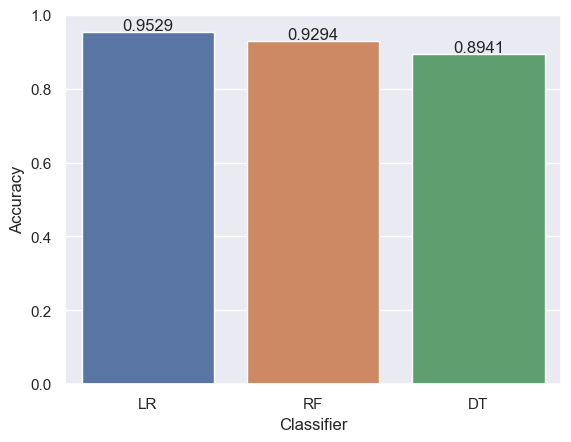

In [112]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")

plt.show()

# **Analysis**